In [20]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
stock = '^FTSE'
data = yf.download(stock,'2010-01-01','2023-05-14')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5412.899902,5500.299805,5410.799805,5500.299805,5500.299805,750942000
2010-01-05,5500.299805,5536.399902,5480.700195,5522.500000,5522.500000,1149301200
2010-01-06,5522.500000,5536.500000,5497.700195,5530.000000,5530.000000,998295300
2010-01-07,5530.000000,5551.700195,5499.799805,5526.700195,5526.700195,1162933700
2010-01-08,5526.700195,5549.299805,5494.799805,5534.200195,5534.200195,1006420600


In [22]:
price = data['Close']
price

Date
2010-01-04    5500.299805
2010-01-05    5522.500000
2010-01-06    5530.000000
2010-01-07    5526.700195
2010-01-08    5534.200195
                 ...     
2023-05-05    7778.399902
2023-05-09    7764.100098
2023-05-10    7741.299805
2023-05-11    7730.600098
2023-05-12    7754.600098
Name: Close, Length: 3371, dtype: float64

<Axes: xlabel='Date'>

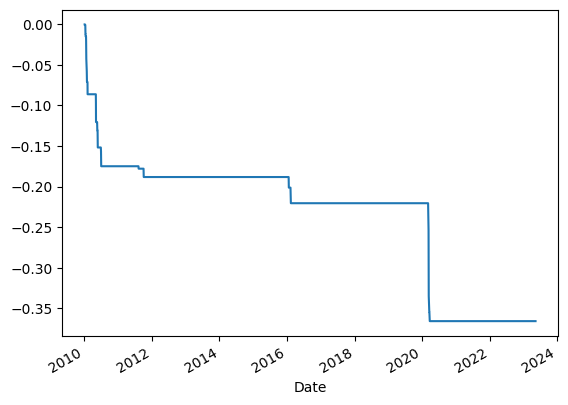

In [23]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()


In [24]:
print(f"Maximum Drawdown is: {mdd[-1]*100} %")

Maximum Drawdown is: -36.60552329617581 %


In [25]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00403618,  0.00135808, ..., -0.00293663,
       -0.00138216,  0.00310455])

In [26]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.00403618, 1.00539974, ..., 1.40743234, 1.40548704,
       1.40985044])

In [27]:
print(f"Cumulative return is {cumulative_ret[-1]*100}%")

Cumulative return is 140.98504396155946%


In [28]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.055526
2012-12-31    0.058414
2013-12-31    0.144342
2014-12-31   -0.027115
2015-12-31   -0.049314
2016-12-31    0.144258
2017-12-31    0.076301
2018-12-31   -0.124834
2019-12-31    0.121030
2020-12-31   -0.143442
2021-12-31    0.143023
2022-12-31    0.009100
2023-12-31    0.040648
Freq: A-DEC, Name: Close, dtype: float64

In [29]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.031994
2010-03-31    0.060715
2010-04-30   -0.022238
2010-05-31   -0.065709
                ...   
2023-01-31    0.042943
2023-02-28    0.013459
2023-03-31   -0.031055
2023-04-30    0.031304
2023-05-31   -0.014738
Freq: M, Name: Close, Length: 161, dtype: float64

In [30]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is {avg_yearly_return*100}%")

Average yearly return is 2.591415353825638%


In [31]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : -12.202848002204957


In [32]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-04-30   -0.022238
2010-05-31   -0.065709
2010-06-30   -0.052328
2010-08-31   -0.006238
2010-11-30   -0.025885
                ...   
2022-08-31   -0.018751
2022-09-30   -0.053596
2022-12-31   -0.016030
2023-03-31   -0.031055
2023-05-31   -0.014738
Name: Close, Length: 68, dtype: float64

In [33]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: -17.756713527075334
